##LIraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder

In [110]:
pd.set_option('display.max_columns', None)

In [111]:
pd.set_option('display.max_rows', None)

In [112]:
train = pd.read_csv('Train.csv')

In [140]:
train.sample()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
51,UGANDA,25-44,Spouse and Children,2.0,1.0,Meetings and Conference,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,12.0,5.0,Cash,No,Friendly People,1000000.0


### Variable Definitions

In [114]:
Variable_definitions = pd.read_csv("VariableDefinitions.csv")
Variable_definitions

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [115]:
#data shape
train.shape

(4809, 23)

In [116]:
#data information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [117]:
#statistical summary

train.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [118]:
# check for missing values
train.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [121]:
for col in train.columns:
    if train[col].isnull().sum() != 0:
        print(f'The percentage of null values in\n{col} column is {round(((train[col].isnull().sum())/len(train))*100, 2)}%\n')

The percentage of null values in
travel_with column is 23.16%

The percentage of null values in
total_female column is 0.06%

The percentage of null values in
total_male column is 0.1%

The percentage of null values in
most_impressing column is 6.51%



In [122]:
#drop the entries with missing values
train.dropna(inplace=True)

In [123]:
train.drop(["ID"], axis=1, inplace=True)

In [124]:
train.isnull().sum()

country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
dtype: int64

In [125]:
#Select features with objects as data types
object = train.select_dtypes(include='object').columns

In [126]:
object

Index(['country', 'age_group', 'travel_with', 'purpose', 'main_activity',
       'info_source', 'tour_arrangement', 'package_transport_int',
       'package_accomodation', 'package_food', 'package_transport_tz',
       'package_sightseeing', 'package_guided_tour', 'package_insurance',
       'payment_mode', 'first_trip_tz', 'most_impressing'],
      dtype='object')

In [127]:
# Valuable count in each categorical feature
for i in object:
    print(f'{i} : {train[i].nunique()} unique values')

country : 98 unique values
age_group : 4 unique values
travel_with : 5 unique values
purpose : 7 unique values
main_activity : 9 unique values
info_source : 8 unique values
tour_arrangement : 2 unique values
package_transport_int : 2 unique values
package_accomodation : 2 unique values
package_food : 2 unique values
package_transport_tz : 2 unique values
package_sightseeing : 2 unique values
package_guided_tour : 2 unique values
package_insurance : 2 unique values
payment_mode : 4 unique values
first_trip_tz : 2 unique values
most_impressing : 7 unique values


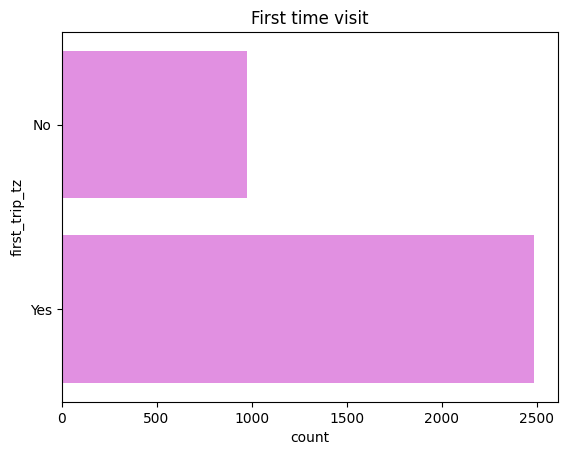

In [129]:
sns.countplot(train['first_trip_tz'], color='violet')
plt.title("First time visit")
plt.show()

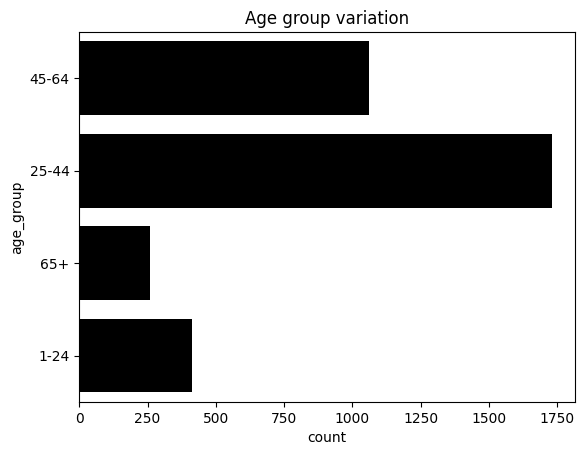

In [130]:
sns.countplot(train['age_group'], color='black')
plt.title("Age group variation")
plt.show()

Most tourists are between 24-44 years

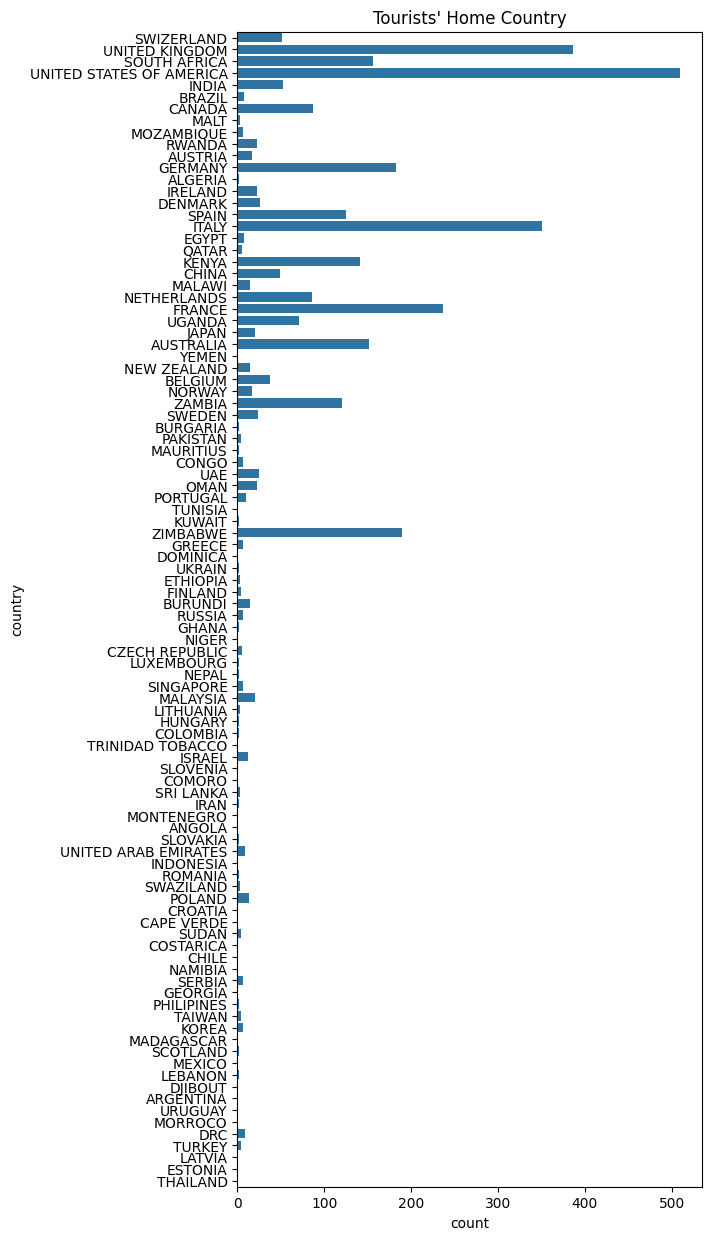

In [132]:
#Country distribution
plt.figure(figsize=(6,15))
sns.countplot(train['country'])
plt.title("Tourists' Home Country")
plt.show()

  - United State of America leads with highest number of tourist, followed by United Kingdom then Italy

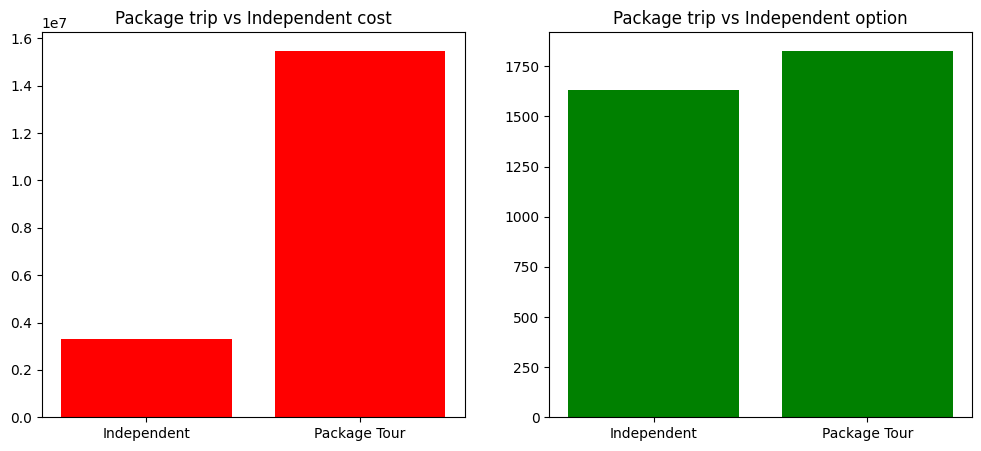

In [136]:
#data regroup
arr = train.groupby('tour_arrangement')['total_cost'].mean().reset_index()
arr2 = train.groupby('tour_arrangement').count().reset_index()

#Visualization
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize=(12,5), sharex=False)

ax1.bar(arr.tour_arrangement, arr.total_cost, color="red")
ax2.bar(arr2.tour_arrangement, arr2.total_cost, color='green')
ax1.set_title("Package trip vs Independent cost")
ax2.set_title("Package trip vs Independent option")
plt.show()

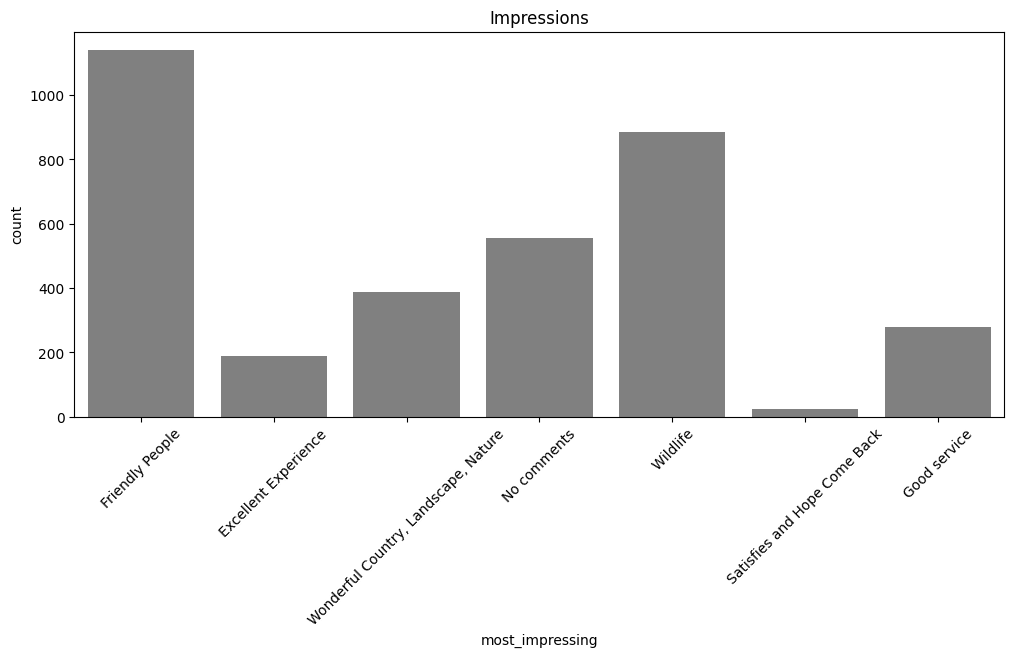

In [141]:
plt.figure(figsize=(12,5))
sns.countplot(x=train.most_impressing, color='gray')
plt.title("Impressions")
plt.xticks(rotation=45)
plt.show()

## Box Plot

C:\Users\bency\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



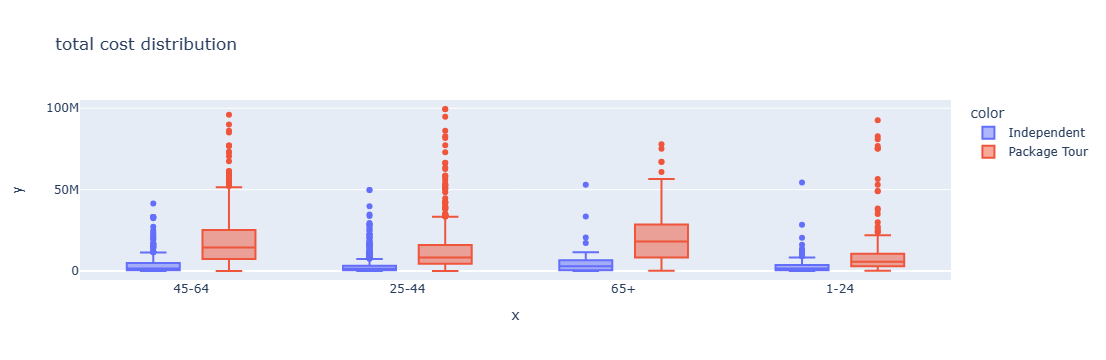

<Figure size 1200x700 with 0 Axes>

In [142]:
plt.figure(figsize=(12,7))
fig = px.box(x = train.age_group, y=train.total_cost, color=train.tour_arrangement, title = "total cost distribution")
fig.show()

### Categorical and Numerical entries

In [144]:
#filtering out columns with only two categorical features
object_less3 = []
for i in object:
    if train[i].nunique() < 3:
        object_less3.append(i)
#more features
object_more3 = []
for i in object:
    if train[i].nunique() > 2:
        object_more3.append(i)

In [145]:
object_less3

['tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'first_trip_tz']

In [146]:
object_more3

['country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'payment_mode',
 'most_impressing']

In [147]:
#Label encoding the object_less features
label = LabelEncoder()
for i in object_less3:
    train[i] = label.fit_transform(train[i])

In [148]:
train.head()

,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",0,0,0,0,0,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5
2,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",0,0,0,0,0,0,0,0,1.0,31.0,Cash,0,Excellent Experience,3315000.0
3,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",1,0,1,1,1,1,1,0,11.0,0.0,Cash,1,Friendly People,7790250.0
6,SOUTH AFRICA,45-64,Alone,0.0,1.0,Business,Mountain climbing,"Friends, relatives",0,0,0,0,0,0,0,0,9.0,0.0,Cash,1,Friendly People,466140.0
7,UNITED STATES OF AMERICA,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",1,1,1,1,1,1,1,1,10.0,3.0,Cash,1,Friendly People,3480750.0


In [149]:
# One hot encoding the othe categorical columns

for i in object_more3:
    train = pd.get_dummies(train, columns=[i])


In [150]:
#convert the logical values to numeric
train = train.astype('int')

In [25]:
train.head()

,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,total_cost,country_ALGERIA,country_ANGOLA,country_ARGENTINA,country_AUSTRALIA,country_AUSTRIA,country_BELGIUM,country_BRAZIL,country_BURGARIA,country_BURUNDI,country_CANADA,country_CAPE VERDE,country_CHILE,country_CHINA,country_COLOMBIA,country_COMORO,country_CONGO,country_COSTARICA,country_CROATIA,country_CZECH REPUBLIC,country_DENMARK,country_DJIBOUT,country_DOMINICA,country_DRC,country_EGYPT,country_ESTONIA,country_ETHIOPIA,country_FINLAND,country_FRANCE,country_GEORGIA,country_GERMANY,country_GHANA,country_GREECE,country_HUNGARY,country_INDIA,country_INDONESIA,country_IRAN,country_IRELAND,country_ISRAEL,country_ITALY,country_JAPAN,country_KENYA,country_KOREA,country_KUWAIT,country_LATVIA,country_LEBANON,country_LITHUANIA,country_LUXEMBOURG,country_MADAGASCAR,country_MALAWI,country_MALAYSIA,country_MALT,country_MAURITIUS,country_MEXICO,country_MONTENEGRO,country_MORROCO,country_MOZAMBIQUE,country_NAMIBIA,country_NEPAL,country_NETHERLANDS,country_NEW ZEALAND,country_NIGER,country_NORWAY,country_OMAN,country_PAKISTAN,country_PHILIPINES,country_POLAND,country_PORTUGAL,country_QATAR,country_ROMANIA,country_RUSSIA,country_RWANDA,country_SCOTLAND,country_SERBIA,country_SINGAPORE,country_SLOVAKIA,country_SLOVENIA,country_SOUTH AFRICA,country_SPAIN,country_SRI LANKA,country_SUDAN,country_SWAZILAND,country_SWEDEN,country_SWIZERLAND,country_TAIWAN,country_THAILAND,country_TRINIDAD TOBACCO,country_TUNISIA,country_TURKEY,country_UAE,country_UGANDA,country_UKRAIN,country_UNITED ARAB EMIRATES,country_UNITED KINGDOM,country_UNITED STATES OF AMERICA,country_URUGUAY,country_YEMEN,country_ZAMBIA,country_ZIMBABWE,age_group_1-24,age_group_25-44,age_group_45-64,age_group_65+,travel_with_Alone,travel_with_Children,travel_with_Friends/Relatives,travel_with_Spouse,travel_with_Spouse and Children,purpose_Business,purpose_Leisure and Holidays,purpose_Meetings and Conference,purpose_Other,purpose_Scientific and Academic,purpose_Visiting Friends and Relatives,purpose_Volunteering,main_activity_Beach tourism,main_activity_Bird watching,main_activity_Conference tourism,main_activity_Cultural tourism,main_activity_Diving and Sport Fishing,main_activity_Hunting tourism,main_activity_Mountain climbing,main_activity_Wildlife tourism,main_activity_business,"info_source_Friends, relatives","info_source_Newspaper, magazines,brochures","info_source_Radio, TV, Web",info_source_Tanzania Mission Abroad,info_source_Trade fair,"info_source_Travel, agent, tour operator",info_source_inflight magazines,info_source_others,payment_mode_Cash,payment_mode_Credit Card,payment_mode_Other,payment_mode_Travellers Cheque,most_impressing_ Wildlife,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature"
0,1,1,0,0,0,0,0,0,0,0,13,0,0,674602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,31,0,3315000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,1,1,0,1,1,1,1,1,0,11,0,1,7790250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,

In [151]:
train.shape

(3460, 156)

In [154]:
#sns.heatmap(train, annot=True, cmap="YlGnBu")

## Notes
- Stand scaling
- Boxplot
- visualization
- feature engineering

# Section 2

In [149]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

#from sklearn.metrics import accuracy

ImportError: cannot import name 'accuracy' from 'sklearn.metrics' (C:\Users\bency\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\__init__.py)

In [143]:
X = train.drop(['total_cost'], axis = 1)
y = train['total_cost']

In [145]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [146]:
rf = RandomForestRegressor()

In [147]:
model = rf.fit(X_train, y_train)

In [148]:
preds = model.predict(X_test)

In [150]:
model.score(X_test, y_test)

0.3203361064264164

In [151]:
model.score(X_train, y_train)

0.9019891156581357